# 3D Deconvolution Benchmark: Julia

---
## Setup

In [9]:
using DeconvOptim, Images, FFTW, Noise, ImageView, BenchmarkTools

---
## Test Image



In [10]:
img = convert(Array{Float32}, channelview(load("simple_3d_ball.tif")));

In [11]:
psf = ifftshift(convert(Array{Float32}, channelview(load("simple_3d_psf.tif"))));

In [7]:
# psf ./= sum(psf)
# # create a blurred, noisy version of that image
# img_b = conv(img, psf, [1, 2, 3])
# img_n = poisson(img_b, 300);
# save("simple_3d_ball_blurred.tif", img_n)

In [12]:
img_n = convert(Array{Float32}, channelview(load("simple_3d_ball_blurred.tif")));

In [13]:
reg = TV(num_dims=3, sum_dims=[1, 2, 3]);

In [14]:
res2, ores = deconvolution(img_n, psf, regularizer=reg, loss=Poisson(),
                          λ=0.05, padding=0, iterations=10);

In [15]:
@benchmark deconvolution(img_n, psf, regularizer=reg, loss=Poisson(), λ=0.05, padding=0, iterations=10)  samples=100 evals=1 seconds=60

BenchmarkTools.Trial: 100 samples with 1 evaluation.
 Range (min … max):   79.100 ms … 234.098 ms  ┊ GC (min … max):  0.57% … 62.93%
 Time  (median):      85.764 ms               ┊ GC (median):     2.56%
 Time  (mean ± σ):   111.198 ms ±  51.809 ms  ┊ GC (mean ± σ):  26.24% ± 23.02%

  ▁█                                                             
  ███▅▄▆▅▅▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▄▃▄▄▃▃ ▃
  79.1 ms          Histogram: frequency by time          225 ms <

 Memory estimate: 147.59 MiB, allocs estimate: 2671.

In [16]:
res, ores = deconvolution(img_n, psf, regularizer=nothing, iterations=10);

In [17]:
@benchmark deconvolution(img_n, psf, regularizer=nothing, iterations=10) samples=100 evals=1 seconds=60

BenchmarkTools.Trial: 100 samples with 1 evaluation.
 Range (min … max):  71.765 ms … 209.148 ms  ┊ GC (min … max): 0.31% … 64.26%
 Time  (median):     74.766 ms               ┊ GC (median):    1.55%
 Time  (mean ± σ):   78.941 ms ±  22.843 ms  ┊ GC (mean ± σ):  7.09% ± 11.04%

  ▇█▂                                                           
  ███▁▁▅▆▁▁▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▆ ▅
  71.8 ms       Histogram: log(frequency) by time       206 ms <

 Memory estimate: 93.57 MiB, allocs estimate: 2207.

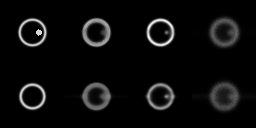

In [18]:
img_comb1 = [img[:, : ,32] res2[:, :, 32] res[:, :, 32] img_n[:, :, 32]]
img_comb2 = [img[:, : ,38] res2[:, :, 38] res[:, :, 38] img_n[:, :, 38]]

img_comb = cat(img_comb1, img_comb2, dims=1)
img_comb ./= maximum(img_comb)

# imshow([img[:, :, 20:end] res2[:, :, 20:end] res[:, :, 20:end] img_n[:, :, 20:end]])
colorview(Gray, img_comb)

---
## Cell 3D

In [24]:
cell = convert(Array{Float32}, channelview(load("cells3d_convolved.tiff")));

In [25]:
cell_psf = convert(Array{Float32}, channelview(load("cells3d_psf.tiff")));

In [26]:
cell /= maximum(cell);
cell_psf /= maximum(cell_psf);

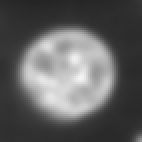

In [27]:
colorview(Gray, cell[:,:,30])

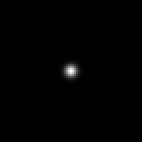

In [28]:
colorview(Gray, cell_psf[:,:,30])

In [29]:
cell_res, cell_ores = deconvolution(cell, ifftshift(cell_psf), regularizer=nothing, iterations=10);

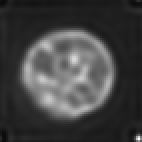

In [30]:
colorview(Gray, cell_res[:,:,30]/maximum(cell_res[:,:,30]))

In [31]:
@benchmark deconvolution(cell, ifftshift(cell_psf), regularizer=nothing, iterations=10) samples=100 evals=1 seconds=60

BenchmarkTools.Trial: 100 samples with 1 evaluation.
 Range (min … max):  427.467 ms … 577.024 ms  ┊ GC (min … max): 0.07% … 23.21%
 Time  (median):     431.148 ms               ┊ GC (median):    0.51%
 Time  (mean ± σ):   436.169 ms ±  20.120 ms  ┊ GC (mean ± σ):  1.16% ±  3.25%

  ▇█                                                             
  ███▃▄▃▄▄▄▂▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂ ▂
  427 ms           Histogram: frequency by time          563 ms <

 Memory estimate: 105.90 MiB, allocs estimate: 2196.